## Imports


In [1]:
import numpy as np
import sklearn
import sklearn.datasets
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay


# Øvelse
I denne opgave skal i kigge på at bruge sklearn til at implementere en række modeller på det samme dataset. 

In [2]:
wine = sklearn.datasets.load_wine()


# Iris datasættet er som sagt ikke bare et numpy array :(((, så for at tilgå dataen skal vi bruge nogle af datasættets egenskaber (properties i Python) således:

print(f"Der er {wine.data.shape[0]} datapunkter, hver med {wine.data.shape[1]} features \n")

print(f"Datasaettets features hedder {wine.feature_names} \n")

print(f"Et udsnit af de foerste 10 punkter er: \n {wine.data[:10]} \n")

print(f"Disse 10 foerste punkters targets (deres y-vaerdier er): \n {wine.target[:10]} \n")

Der er 178 datapunkter, hver med 13 features 

Datasaettets features hedder ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'] 

Et udsnit af de foerste 10 punkter er: 
 [[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+

In [3]:
new_ordering = np.random.permutation(len(wine.data))

wine.data = wine.data[new_ordering]
wine.target = wine.target[new_ordering]

print(f"De 10 nye første værdier er nu \n {wine.data[:10]} \n")

print(f"Med tilhørende nye værdier: \n {wine.target[:10]} \n")


De 10 nye første værdier er nu 
 [[1.327e+01 4.280e+00 2.260e+00 2.000e+01 1.200e+02 1.590e+00 6.900e-01
  4.300e-01 1.350e+00 1.020e+01 5.900e-01 1.560e+00 8.350e+02]
 [1.378e+01 2.760e+00 2.300e+00 2.200e+01 9.000e+01 1.350e+00 6.800e-01
  4.100e-01 1.030e+00 9.580e+00 7.000e-01 1.680e+00 6.150e+02]
 [1.236e+01 3.830e+00 2.380e+00 2.100e+01 8.800e+01 2.300e+00 9.200e-01
  5.000e-01 1.040e+00 7.650e+00 5.600e-01 1.580e+00 5.200e+02]
 [1.305e+01 1.650e+00 2.550e+00 1.800e+01 9.800e+01 2.450e+00 2.430e+00
  2.900e-01 1.440e+00 4.250e+00 1.120e+00 2.510e+00 1.105e+03]
 [1.406e+01 1.630e+00 2.280e+00 1.600e+01 1.260e+02 3.000e+00 3.170e+00
  2.400e-01 2.100e+00 5.650e+00 1.090e+00 3.710e+00 7.800e+02]
 [1.146e+01 3.740e+00 1.820e+00 1.950e+01 1.070e+02 3.180e+00 2.580e+00
  2.400e-01 3.580e+00 2.900e+00 7.500e-01 2.810e+00 5.620e+02]
 [1.341e+01 3.840e+00 2.120e+00 1.880e+01 9.000e+01 2.450e+00 2.680e+00
  2.700e-01 1.480e+00 4.280e+00 9.100e-01 3.000e+00 1.035e+03]
 [1.208e+01 1.830e+00 

Til sidst splitter vi data i træningsdata og testdata

In [6]:
idx = np.random.permutation(wine.data.shape[0])
X, y = wine.data[idx], wine.target[idx]
X_train, y_train = X[:int(0.6 * X.shape[0])], y[:int(0.6 * X.shape[0])]
X_val, y_val = X[int(0.6 * X.shape[0]):int(0.8 * X.shape[0])], y[int(0.6 * X.shape[0]):int(0.8 * X.shape[0])]
X_test, y_test = X[int(0.8 * X.shape[0]):], y[int(0.8 * X.shape[0]):]

106
106
(106, 13)
(106,)
(13,)


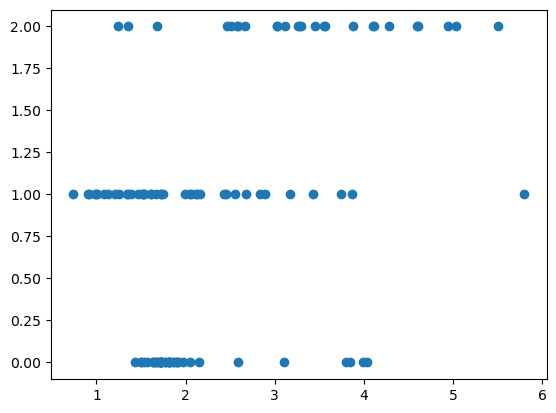

In [25]:
print(len(X_train))
print(len(y_train))

print(X_train.shape)
print(y_train.shape)

print(X_train[0].shape)

plt.scatter(X_train[:,1], y_train)



### Øvelse 1
Træn `sklearn.neighbors.KNeighborsClassifier` på wine træningsdatasættet.

In [29]:


clf = sklearn.neighbors.KNeighborsClassifier(5)


clf.fit(X_train, y_train)

KNeighborsClassifier()

In [31]:
clf.predict(X_test)

array([1, 1, 0, 1, 1, 0, 2, 1, 1, 0, 1, 1, 2, 2, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 2, 1, 0, 0, 2, 1, 0, 0, 1, 1])

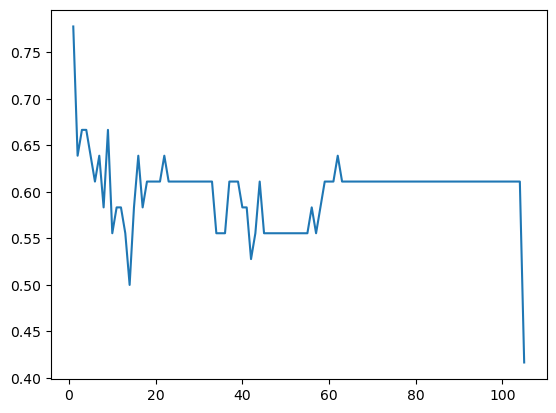

Brug valideringsdatasættet til at bestemme den bedste værdi for antallet af naboer `k`, samt hvorvidt vægte forbedre resultatet. Plot resultatet:

In [ ]:
accuracy = []
for k in range(1, len(X_train)):
    clf = sklearn.neighbors.KNeighborsClassifier(k)
    clf.fit(X_train, y_train)
    val_pred = clf.predict(X_val)
    accuracy.append(np.mean(val_pred == y_val))

plt.plot(range(1, len(X_train)), accuracy);


Brug resultatet til fra forrige opgave til at bestemme den bedste model. Brug test sættet til at få et estimat for det aktuelle loss. 

In [58]:
model = sklearn.neighbors.KNeighborsClassifier(1)

model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(X_test[:,0].shape)

loss = np.mean(predictions != y_test)

print(loss)

(36,)
0.25


Vi antager at vores testset gav et fornuftigt estimat for vores nøjagtighed. Svare det til den nøjagtighed vi forventede fra udvælgelsen af `k`? Hvis nej, hvad kunne dette skyldes?

### Øvelse 2
Træn `sklearn.svm.SVC` på wine træningsdatasættet. Prøv at finde ud af hvad en SVM egentlig er for en slags model.

In [ ]:
svc_model = 


# Din kode her

For en support vector machine er der mange hyperparametre der kunne være interessante at kigge på. Lav en søgning der finder den bedste kombination af følgende parametre for `sklearn.svm.SVC`. Læs dokumentationen for at finde ud af hvilke værdier de kan tage, og hvornår de betyder noget.
* `C`
* `kernel`
* `degree`

In [ ]:
# Din kode her

Brug resultatet til fra forrige opgave til at bestemme den bedste model. Brug test sættet til at få et estimat for det aktuelle loss. 

In [ ]:
# Din kode her

Vi antager at vores testset gav et fornuftigt estimat for vores nøjagtighed. Svare det til den nøjagtighed vi forventede fra udvælgelsen af hyperparametre? Hvis nej, hvad kunne dette skyldes?